# codecentric.AI Bootcamp - Gradient Boosting & XGBoost

## Aufgaben + Lösungen

Hier findet ihr die Lösungen zu den Gradient Boosting & XGBoost.

Die folgenden Pakete werden geladen:

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Datensätze aus Scikit-learn

Für die nachfolgenden Übungsaufgaben wollen wir zwei Datensätze verwenden, einen für Klassifikationsmodelle und einen anderen für Regressionsmodelle.

- `iris`
- `boston`

In [22]:
# Irisdaten für Klassifikation
from sklearn.datasets import load_iris

# Boston Hauspreise für Regression
from sklearn.datasets import load_boston

In [23]:
features_iris, target_iris = load_iris(return_X_y=True)

In [24]:
features_boston, target_boston = load_boston(return_X_y=True)

### Daten mit Scikit-learn in Trainings- und Testsets aufteilen

Nun wollen wir die beiden Datensätze, die wir geladen haben, in Trainings- und Testsets aufteilen.

In [25]:
from sklearn.model_selection import train_test_split

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(features_iris, 
                                                                        target_iris,
                                                                        test_size = 0.2,
                                                                        random_state = 42,
                                                                        stratify = target_iris)

In [26]:
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(features_boston, 
                                                                                target_boston,
                                                                                test_size = 0.2,
                                                                                random_state = 42)

### Aufgabe 1: Klassifikation mit Gradient Boosting in Scikit-learn

Nun sind unsere `iris` Daten bereit für das Trainieren von Modellen.

- Importiere den Gradient Boosting Klassifikationsalgorithmus.
- Definiere den Gradient Boosting Algorithmus mit den folgenden Hyperparametern: 100 Bäume mit maximaler Tiefe von 3, maximaler Anzahl in Betracht zu ziehender Instanzen pro Split von 3 und Lernrate von 0.1.
- Trainiere das so definierte Modell auf den `iris` Trainingsdaten.

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_class = GradientBoostingClassifier(
    learning_rate=0.1,
    loss = "deviance",
    n_estimators = 100,
    min_samples_split = 3,
    min_samples_leaf = 3,
    max_depth = 3,
    random_state = 42
)
gbm_class.fit(X_train_iris, y_train_iris)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

- Importiere die Funktion zur Erstellung von Kreuzmatrizen aus Scikit-learn.
- Nutze das Gradient Boosting Klassifikationsmodell um Vorhersagen auf den Testdaten zu machen.
- Vergleiche die vorhergesagten Klassen mit den tatsächlichen Klassen des Testsets, indem du die Kreuzmatrix ausgeben lässt.

In [28]:
from sklearn.metrics import confusion_matrix

y_pred_gbm_class = gbm_class.predict(X_test_iris)
confusion_matrix(y_test_iris, y_pred_gbm_class, labels=np.unique(y_test_iris))

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  2,  8]])

### Aufgabe 2: Regression mit Gradient Boosting in Scikit-learn

Auch unsere `boston` Daten sind bereit für das Trainieren von Modellen.

- Importiere den Gradient Boosting Regressionsalgorithmus.
- Definiere den Gradient Boosting Algorithmus mit den folgenden Hyperparametern: Least Squares Loss, 100 Bäume mit maximaler Tiefe von 3, maximaler Anzahl in Betracht zu ziehender Instanzen pro Split von 3 und Lernrate von 0.1.
- Trainiere das so definierte Modell auf den `boston` Trainingsdaten.

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_reg = GradientBoostingRegressor(
    learning_rate=0.1,
    loss = "ls",
    n_estimators = 100,
    min_samples_split = 3,
    min_samples_leaf = 3,
    max_depth = 3,
    random_state = 42
)
gbm_reg.fit(X_train_boston, y_train_boston)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

- Nutze das Gradient Boosting Regressionsmodell um Vorhersagen auf den Testdaten zu machen.

In [30]:
y_pred_gbm_reg = gbm_reg.predict(X_test_boston)

- Importiere die Funktion für den mittleren absoluten Fehler aus Scikit-learn.
- Berechne den mittleren absoluten Fehler für die Vorhersagen der Testdaten.

In [31]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test_boston, y_pred_gbm_reg)

1.9204267228009915

### Datenvorbereitung für H2O

Mit Scikit-learn hast du erfolgreich Klassifikations- und Regressionsmodelle mit Random Forest trainiert. Jetzt wollen wir uns angucken, wie das Ganze mit h2o funktioniert.

In [32]:
import h2o
h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,30 mins 16 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,5 days
H2O cluster name:,H2O_from_python_unknownUser_v3xqg4
H2O cluster total nodes:,1
H2O cluster free memory:,275.8 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [37]:
data_iris = load_iris()
df_iris = pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
target_iris = pd.DataFrame({'class':data_iris.target})

df_c_iris = pd.concat([target_iris, df_iris], axis=1)
df_c_iris.head()

,class,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


In [38]:
data_boston = load_boston()
df_boston = pd.DataFrame(data_boston.data, columns=data_boston.feature_names)
target_boston = pd.DataFrame({'target':data_boston.target})

df_c_boston = pd.concat([target_boston, df_boston], axis=1)
df_c_boston.head()

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
hf_iris = h2o.H2OFrame(df_c_iris)
hf_iris[0] = hf_iris[0].asfactor()  

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [40]:
train_iris, valid_iris, test_iris = hf_iris.split_frame([0.7, 0.15], seed=42)

In [41]:
hf_X_iris = hf_iris.col_names[1:len(hf_iris.col_names)]
hf_X_iris

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [42]:
hf_y_iris = hf_iris.col_names[0]
hf_y_iris

'class'

### Aufgabe 3: Gradient Boosting mit H2O

- Definiere die Gradient Boosting Funktion aus `h2o` mit den folgenden [Hyperparametern](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2ogradientboostingestimator): 300 Bäumen, maximaler Baumtiefe von 3 und Lernrate von 0.1.

In [43]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

gbm_h2o_class = H2OGradientBoostingEstimator(
    ntrees = 300,
    learn_rate = 0.1,
    max_depth = 3,
    min_rows = 3,
    seed = 42
)

- Trainiere den Random Forest Algorithmus mit den `iris` Trainings- und Validierungsdaten.

In [44]:
gbm_h2o_class.train(x = hf_X_iris, 
                    y = hf_y_iris, 
                    training_frame = train_iris, 
                    validation_frame = valid_iris)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


- Berechne die Modell-Performance auf den Testdaten.

In [45]:
performance_class = gbm_h2o_class.model_performance(test_data=test_iris)
print(performance_class)


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.09523761190259161
RMSE: 0.3086059168301729
LogLoss: 1.2486390302290151
Mean Per-Class Error: 0.13333333333333333
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,Error,Rate
8.0,0.0,0.0,0.0,0 / 8
0.0,8.0,0.0,0.0,0 / 8
0.0,2.0,3.0,0.4,2 / 5
8.0,10.0,3.0,0.0952381,2 / 21


Top-3 Hit Ratios: 


k,hit_ratio
1,0.9047619
2,1.0
3,1.0


### Gradient Boosting Regression mit H2O

In [46]:
hf_boston = h2o.H2OFrame(df_c_boston)
train_boston, test_boston = hf_boston.split_frame([0.7], seed=42)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [47]:
hf_X_boston = hf_boston.col_names[1:len(hf_boston.col_names)]
hf_X_boston

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [48]:
hf_y_boston = hf_boston.col_names[0]
hf_y_boston

'target'

### Aufgabe 4:

- Definiere die Gradient Boosting Funktion aus `h2o` mit den folgenden [Hyperparametern](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2ogradientboostingestimator): 300 Bäumen, maximaler Baumtiefe von 3 und Lernrate von 0.1.

In [50]:
gbm_h2o_reg = H2OGradientBoostingEstimator(
    ntrees = 300,
    learn_rate = 0.1,
    max_depth = 3,
    min_rows = 3,
    seed = 42
)

- Trainiere den Gradient Boosting Algorithmus mit den `boston` Trainingsdaten.

In [51]:
gbm_h2o_reg.train(x = hf_X_boston, 
             y = hf_y_boston, 
             training_frame = train_boston)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


- Berechne die Modell-Performance auf den Testdaten.

In [52]:
performance_reg = gbm_h2o_reg.model_performance(test_data=test_boston)
print(performance_reg)


ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 9.539117429326987
RMSE: 3.088546167588723
MAE: 2.1725234880849564
RMSLE: 0.17285744301560663
Mean Residual Deviance: 9.539117429326987



- Lasse dir Werte für die Antwortvariable für alle Testdaten vorhersagen. 

In [53]:
pred_test_boston = gbm_h2o_reg.predict(test_boston)
pred_test_boston

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict
21.8397
21.8943
21.3659
20.4696
18.7836
17.1348
13.7743
15.4483
14.7144
19.4906


Diese vorhergesagten Werte können wir zum Beispiel gegen die tatsächlichen Werte plotten:

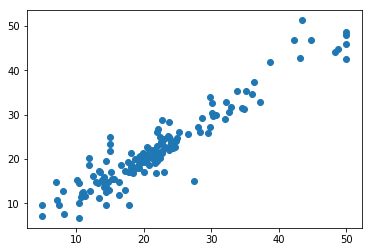

In [54]:
plt.scatter(test_boston.as_data_frame().target, pred_test_boston.as_data_frame().predict)

In der Abbildung oben sehen wir auf der x-Achse die tatsächlichen Hauspreise, auf der y-Achse sehen wir die vorhersagten Preise. So können wir vergleichen, wie nahe unsere Vorhersage an der Wirklichkeit dran sind. Im perfekten Szenario, währen alle Werte gleich und die Punkte würden auf einer Geraden x=y liegen.

### Aufgabe 5: XGBoost mit Scikit-learn

- Importiere das xgboost-Paket.
- Definiere den XGBoost Classifier.

In [56]:
import xgboost as xgb
xgboost = xgb.XGBClassifier()

- Trainiere den XGBoost Classifier auf den Boston Daten.

In [57]:
xgboost.fit(X_train_boston, y_train_boston)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

- Und nutze das Modell für Vorhersagen auf den Testdaten.

In [60]:
xgb_pred_test_boston = xgboost.predict(X_test_boston)
xgb_pred_test_boston

array([22. , 32. , 15.2, 21.7, 14.9, 19.8, 20.3, 17.8, 21.4, 23.2, 18.7,
       16.5,  8.8, 21.7, 20.4, 16.1, 20.5,  7.2, 50. , 17.8, 24.7, 32. ,
       21. , 22. , 21.9, 19.1, 19.8, 14.1, 21.7, 20. , 19.5, 23.1, 10.2,
       21.9, 19.1, 15.6, 28.7, 18.9, 21.2, 23.7, 17.5, 33.4, 50. , 20.1,
       22. , 11.9, 16.2, 23.1, 19.1, 21. , 16.5, 31.6, 21. , 19.8, 50. ,
       20.6, 14.3, 27.9, 22.2, 20.5, 24.4, 34.9, 22.6, 19.9, 18.6, 19.3,
       17.8, 22.9, 34.9, 14.1, 24.7, 25. , 14.6, 18.2, 21.7,  7.2, 21.2,
       50. ,  7.2, 13.3, 19.4, 15. , 22. , 11.8, 20. , 30.1, 14.3, 24.6,
       20.6, 18.4, 21.7,  8.8, 19.2, 17.5, 23.3, 18.4, 25. ,  7.2,  8.4,
       13.3, 20.1, 18.6])

### Aufgabe 6: XGBoost mit dem xgboost-Paket

- Wandle die Trainings- und Testdaten des Boston-Datensatzes in DMatrizen um.

In [61]:
data_dmatrix = xgb.DMatrix(data=X_train_boston,label=y_train_boston)
test_dmatrix = xgb.DMatrix(data=X_test_boston,label=y_test_boston)

Definiere die folgenden [Hyperparameter](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters):

- Maximale Baumtiefe von 3
- Lernrate von 0.1
- 80% Samplingrate für Instanzen

In [ ]:
params = {'max_depth':3, 
          'learning_rate':0.1, 
          'subsample':0.8,
          'silent':1}

- Definiere eine Watchliste mit Trainings- und Testdaten.

In [ ]:
watchlist = [(data_dmatrix, 'train'), (test_dmatrix, 'test')]

- Trainiere das Modell mit 50 Boostingrunden.

In [62]:
bst = xgb.train(dtrain=data_dmatrix, 
                params=params, 
                num_boost_round=50,
                evals=watchlist)

[0]	train-rmse:21.8733	test-rmse:20.5688
[1]	train-rmse:19.8086	test-rmse:18.6594
[2]	train-rmse:17.951	test-rmse:16.943
[3]	train-rmse:16.2754	test-rmse:15.3925
[4]	train-rmse:14.7717	test-rmse:14.0048
[5]	train-rmse:13.409	test-rmse:12.7556
[6]	train-rmse:12.1828	test-rmse:11.6087
[7]	train-rmse:11.0755	test-rmse:10.5755
[8]	train-rmse:10.0822	test-rmse:9.66118
[9]	train-rmse:9.18422	test-rmse:8.89161
[10]	train-rmse:8.37385	test-rmse:8.16607
[11]	train-rmse:7.64368	test-rmse:7.52407
[12]	train-rmse:6.98843	test-rmse:6.90959
[13]	train-rmse:6.39663	test-rmse:6.41436
[14]	train-rmse:5.86526	test-rmse:5.94683
[15]	train-rmse:5.38669	test-rmse:5.5066
[16]	train-rmse:4.95672	test-rmse:5.16946
[17]	train-rmse:4.56457	test-rmse:4.87243
[18]	train-rmse:4.2161	test-rmse:4.60703
[19]	train-rmse:3.90018	test-rmse:4.35445
[20]	train-rmse:3.61885	test-rmse:4.14858
[21]	train-rmse:3.36318	test-rmse:3.94338
[22]	train-rmse:3.13688	test-rmse:3.81865
[23]	train-rmse:2.92756	test-rmse:3.69144
[24]	tr

- Evaluiere das Modell.

In [64]:
bst.eval(test_dmatrix)

'[0]\teval-rmse:2.698654'

- Mache Vorhersagen auf den Testdaten

In [65]:
preds_xgb = bst.predict(test_dmatrix)
preds_xgb

array([23.90171 , 30.411238, 16.834118, 23.38023 , 17.29689 , 21.493326,
       18.720419, 13.772954, 20.493969, 20.703573, 20.256588, 18.81347 ,
        7.733352, 21.336367, 20.606207, 27.111767, 19.47995 ,  9.29282 ,
       44.5126  , 15.970613, 24.715736, 24.26977 , 14.45585 , 21.706587,
       15.635336, 16.05212 , 20.77195 , 13.443232, 19.179731, 21.434221,
       19.223763, 23.243666, 19.717188, 19.464516, 15.497664, 16.490412,
       31.524961, 19.65163 , 20.778967, 23.61874 , 16.048752, 28.983168,
       44.423817, 19.327625, 22.429167, 14.852316, 15.858551, 23.525114,
       18.388355, 26.799345, 21.242558, 34.64128 , 16.749884, 25.099176,
       46.03076 , 21.283257, 16.194118, 31.848465, 21.828997, 17.86287 ,
       25.072317, 33.715466, 26.232979, 17.56951 , 26.431408, 16.186668,
       13.714041, 23.125172, 27.828123, 14.231892, 21.310644, 26.60504 ,
       10.115174, 21.748236, 21.437536,  6.962781, 20.67494 , 46.437576,
       11.985963, 13.574832, 21.571209, 12.155664, 

- Implementiere XGBoost mit 3x Kreuzvalidierung.

In [63]:
bst_cv = xgb.cv(dtrain=data_dmatrix, 
                params=params, 
                nfold=3,
                num_boost_round=50,
                early_stopping_rounds=10,
                metrics="rmse", 
                as_pandas=True, 
                seed=42)

### Aufgabe 7: XGBoost mit H2O

- Lade die XGBoost Funktion aus H2O.

In [68]:
from h2o.estimators import H2OXGBoostEstimator

Definiere das XGBoost-Modell mit den folgenden [Hyperparametern](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/xgboost.html):

- Maximaler Baumtiefe von 2
- 5x Kreuzvalidierung
- 100 Bäume

In [72]:
xgb_h2o = H2OXGBoostEstimator(
    max_depth = 2,
    nfolds = 5,
    ntrees = 100,
    seed = 42
)

- Trainiere das Modell auf den Boston-Daten.

In [73]:
xgb_h2o.train(x = hf_X_boston, 
         y = hf_y_boston, 
         training_frame = train_boston)

xgboost Model Build progress: |███████████████████████████████████████████| 100%


- Berechne die Performance auf den Testdaten.

In [74]:
performance_xgb = xgb_h2o.model_performance(test_data=test_boston)
print(performance_xgb)


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 10.466619508068176
RMSE: 3.235215527297706
MAE: 2.2929738767587455
RMSLE: 0.17629763103099452
Mean Residual Deviance: 10.466619508068176

